## Logistic Regression

**Link Dataset:** https://www.kaggle.com/datasets/joebeachcapital/diamonds <br> Para este ejercicio se modificó el dataset debido al tamaño de este.

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data:

In [ ]:
import pandas as pd
import numpy as np

df_diamonds = pd.read_csv('diamonds.csv')
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Select the columns we want to use
columns_to_select = ['color','cut','carat','clarity','price']
diamonds = df_diamonds.loc[:, columns_to_select]

# Drop rows with missing values
diamonds.dropna(inplace=True)
diamonds.head()

,color,cut,carat,clarity,price
0,E,Ideal,0.23,SI2,326
1,E,Premium,0.21,SI1,326
2,E,Good,0.23,VS1,327
3,I,Premium,0.29,VS2,334
4,J,Good,0.31,SI2,335


# Let's have a look to our data!

By visualising it with Seaborn

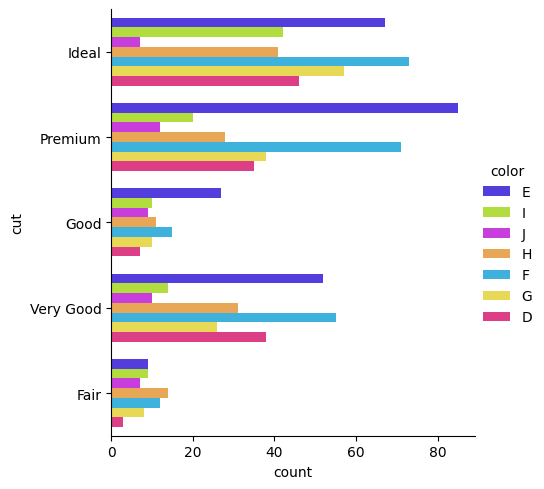

In [ ]:
import seaborn as sns
# Specify colors for each values of the hue variable
palette = {
    'D': '#F72585',
    'H': '#FFAA3E',
    'I': '#BDF723',
    'E': '#4023F7',
    'J': '#DA23F7',
    'G': '#FFED3E',
    'F': '#23BDF7',
}
# Plot a bar plot to visualize how many diamonds of each cut are diferent colors
sns.catplot(
    data=diamonds, y="cut", hue="color", kind="count",
    palette=palette,
)

# Data pre-processing

Let's encode features and labels to better plot the data and train the model

In [ ]:
# Let's look at the different values of the 'Clarity' column
diamonds['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# Encode the 'Clarity' column using ordinal encoding
item_size_categories = [(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'])]
ordinal_features = ['cut']
ordinal_encoder = OrdinalEncoder(categories=item_size_categories)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Encode all the other features using one-hot encoding
categorical_features = ['carat','clarity','price']
categorical_encoder = OneHotEncoder(sparse_output=False)

In [ ]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[
     ('ord', ordinal_encoder, ordinal_features),
     ('cat', categorical_encoder, categorical_features)
     ])
# Get the encoded features as a pandas DataFrame
ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(diamonds)
encoded_features.head()

,ord__cut,cat__carat_0.2,cat__carat_0.21,cat__carat_0.22,cat__carat_0.23,cat__carat_0.24,cat__carat_0.25,cat__carat_0.26,cat__carat_0.28,cat__carat_0.29,...,cat__price_2888,cat__price_2889,cat__price_2890,cat__price_2891,cat__price_2892,cat__price_2893,cat__price_2894,cat__price_2895,cat__price_2896,cat__price_2897
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode the 'Color' column using label encoding
label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(diamonds['color'])
encoded_diamonds = encoded_features.assign(color=encoded_label) #Color Label enconding
encoded_diamonds.head()

,ord__cut,cat__carat_0.2,cat__carat_0.21,cat__carat_0.22,cat__carat_0.23,cat__carat_0.24,cat__carat_0.25,cat__carat_0.26,cat__carat_0.28,cat__carat_0.29,...,cat__price_2889,cat__price_2890,cat__price_2891,cat__price_2892,cat__price_2893,cat__price_2894,cat__price_2895,cat__price_2896,cat__price_2897,color
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6


In [ ]:
# Let's look at the mapping between the encoded values and the original values
list(label_encoder.inverse_transform([0, 1, 2, 3, 4, 5, 6]))

['D', 'E', 'F', 'G', 'H', 'I', 'J']

# Analysing relationships between features and label

<ipython-input-10-58d703004ba7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


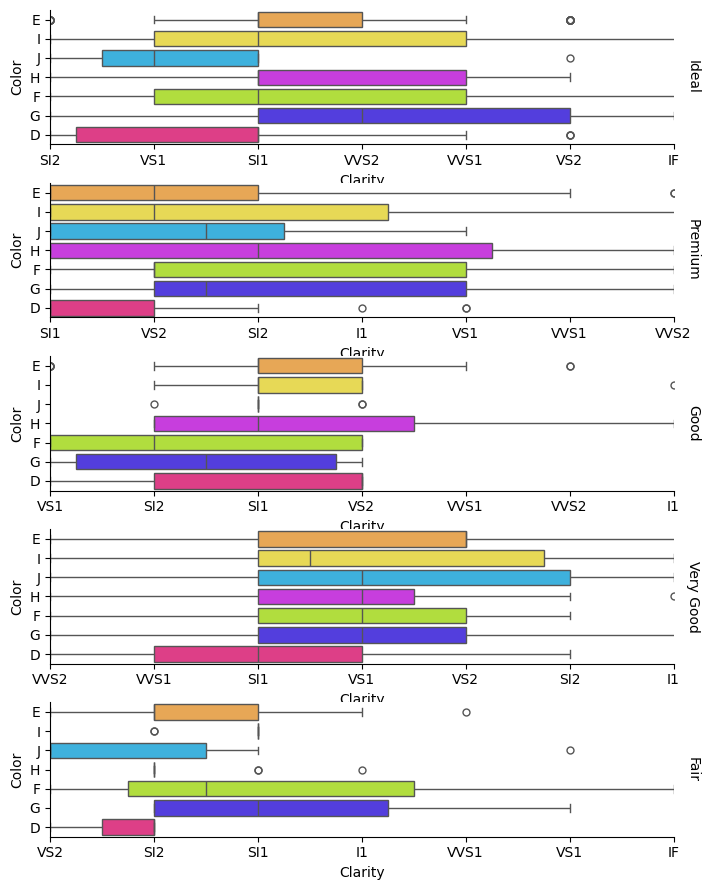

In [ ]:
palette = {
    'D': '#F72585',
    'E': '#FFAA3E',
    'F': '#BDF723',
    'G': '#4023F7',
    'H': '#DA23F7',
    'I': '#FFED3E',
    'J': '#23BDF7',
}
# We need the encoded Item Size column to use it as the x-axis values in the plot
df_diamonds['cut'] = encoded_diamonds['ord__cut']

g = sns.catplot(
    data=diamonds,
    x="clarity", y="color", row='cut',
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.8, aspect=4, palette=palette,
)
# Defining axis labels
g.set(xlabel="Clarity", ylabel="Color").set(xlim=(0,6))
g.set_titles(row_template="{row_name}")


Let's now focus on a specific relationship: Item Size and Color!

In [ ]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='seaborn')

<Axes: xlabel='color', ylabel='ord__cut'>

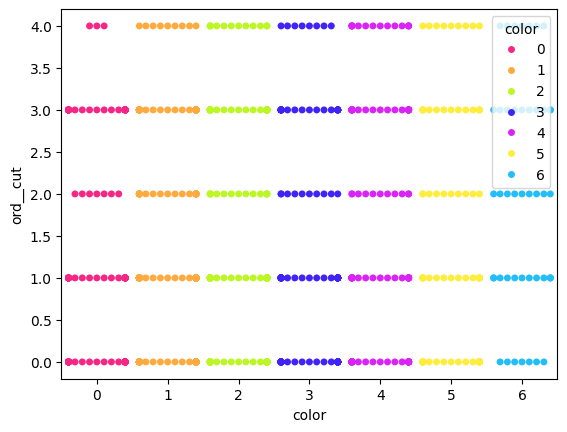

In [ ]:
# Suppressing warning message claiming that a portion of points cannot be placed into the plot due to the high number of data points
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='seaborn')

palette = {
     0 : '#F72585',
     1 : '#FFAA3E',
     2 : '#BDF723',
     3 : '#4023F7',
     4 : '#DA23F7',
     5 : '#FFED3E',
     6 : '#23BDF7',

}
sns.swarmplot(x="color", y="ord__cut", hue="color", data=encoded_diamonds, palette=palette)

**Watch out**: Ignoring warnings is NOT a best practice and should be avoid, whenever possible. Warnings often contain useful messages that let us improve our code and solve an issue.
The reason why we are ignoring this specific warning is to guarantee the readability of the plot. Plotting all the data points with a reduced marker size, while keeping consistency with the palette color, generates an unclear visualization.

# Build your model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
# X is the encoded features
X = encoded_diamonds[encoded_diamonds.columns.difference(['color'])]
# y is the encoded label
y = encoded_diamonds['color']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model on the diamonds dataset
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model and print the results
print(classification_report(y_test, y_pred))
print('Predicted labels: ', y_pred)
print('F1-score: ',f1_score(y_test, y_pred, average='weighted'))

              precision    recall  f1-score   support

           0       0.40      0.32      0.36        31
           1       0.49      0.57      0.52        60
           2       0.37      0.47      0.41        38
           3       0.39      0.47      0.43        19
           4       0.27      0.17      0.21        24
           5       0.31      0.21      0.25        19
           6       0.00      0.00      0.00         9

    accuracy                           0.40       200
   macro avg       0.32      0.32      0.31       200
weighted avg       0.38      0.40      0.38       200

Predicted labels:  [1 1 1 2 2 1 4 1 1 2 2 3 1 0 0 2 2 2 3 1 1 1 4 4 3 5 1 1 2 1 2 1 3 1 1 6 5
 1 5 1 2 1 1 4 2 0 5 2 5 3 0 2 1 1 0 5 1 2 2 2 0 5 2 1 1 0 1 2 2 1 1 5 6 1
 6 1 2 1 2 1 2 1 5 2 0 2 2 2 3 3 0 0 1 5 1 1 2 2 4 3 1 1 0 1 1 3 2 1 4 1 3
 3 0 4 4 1 2 2 1 2 3 1 4 3 2 5 1 1 2 5 0 3 5 1 2 2 0 0 1 4 3 2 0 6 1 1 1 1
 1 4 2 2 2 4 1 1 1 3 0 0 0 6 1 1 2 1 1 0 2 4 1 2 0 3 2 0 1 1 2 3 1 0 1 3 2
 4 3 2 0 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[10, 15,  3,  0,  2,  0,  1],
       [ 7, 34, 10,  7,  2,  0,  0],
       [ 3, 10, 18,  2,  3,  2,  0],
       [ 0,  1,  7,  9,  2,  0,  0],
       [ 2,  4,  7,  2,  4,  4,  1],
       [ 1,  5,  3,  2,  1,  4,  3],
       [ 2,  1,  1,  1,  1,  3,  0]])

Shape de y_test: (200,)
Shape de y_scores: (200, 7)


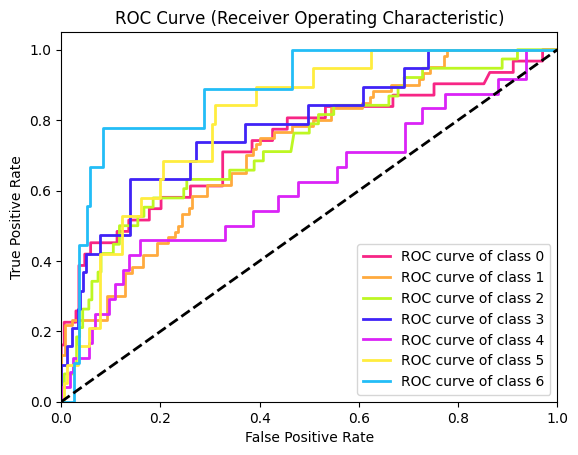

Class 0
FPR: [0.         0.         0.         0.00591716 0.00591716 0.0295858
 0.0295858  0.03550296 0.03550296 0.03550296 0.04733728 0.04733728
 0.0591716  0.0591716  0.11242604 0.11242604 0.13609467 0.13609467
 0.17751479 0.17751479 0.20118343 0.20118343 0.22485207 0.23668639
 0.26035503 0.26035503 0.32544379 0.32544379 0.32544379 0.38461538
 0.38461538 0.39053254 0.40236686 0.4260355  0.4260355  0.43786982
 0.4556213  0.4556213  0.53254438 0.53254438 0.66863905 0.66863905
 0.75147929 0.75147929 0.75739645 0.76923077 0.85207101 0.86390533
 0.9112426  0.9112426  0.95857988 0.9704142  0.9704142  1.        ]
TPR: [0.         0.03225806 0.16129032 0.16129032 0.22580645 0.22580645
 0.25806452 0.25806452 0.29032258 0.38709677 0.38709677 0.41935484
 0.41935484 0.4516129  0.4516129  0.48387097 0.48387097 0.51612903
 0.51612903 0.5483871  0.5483871  0.58064516 0.58064516 0.58064516
 0.58064516 0.61290323 0.61290323 0.64516129 0.70967742 0.70967742
 0.74193548 0.74193548 0.74193548 0.74193548

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from itertools import cycle
%matplotlib inline


y_scores = model.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])
print("Shape de y_test:", y_test.shape)
print("Shape de y_scores:", y_scores.shape)

# Calculate ROC curve
fpr = dict()
tpr = dict()
thresholds = dict()

for i in range(7):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_bin[:,i], y_scores[:, i])

# Plot All Curves ROC
plt.figure()
colors = cycle(['#F72585','#FFAA3E','#BDF723','#4023F7','#DA23F7','#FFED3E','#23BDF7',])
for i, color in zip(range(7), colors):
  # Plot the FPR and TPR achieved by our model
  plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0}'.format(i))

# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Receiver Operating Characteristic)')
plt.legend(loc="lower right")
plt.show()

# Mostrar los valores de FPR, TPR y thresholds para cada clase
for i in range(7):
    print(f'Class {i}')
    print(f'FPR: {fpr[i]}')
    print(f'TPR: {tpr[i]}')
    print(f'Thresholds: {thresholds[i]}\n')

In [ ]:
# Calculate AUC score
auc = dict()
for i in range(7):
  auc[i] = roc_auc_score(y_test_bin[:,i],y_scores[:,1])
print(f'AUC:{auc}')

AUC:{0: 0.6594769994273717, 1: 0.7194047619047619, 2: 0.4689733593242365, 3: 0.31404478045943585, 4: 0.33617424242424243, 5: 0.3131724338470485, 6: 0.2012798138452589}
